In [1]:
# Import packages
import cv2
import math
import skimage.io

# Import some functions to the global namespace for convenience
from scipy.ndimage import *
from scipy.fft import *
from scipy.signal import *
from scipy.stats import *
from skimage.filters import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import *
import skimage.util
from mpl_toolkits import mplot3d

In [44]:
url = "http://sipi.usc.edu/database/download.php?vol=misc&img=4.2.07"
url = "https://9to5mac.com/wp-content/uploads/sites/6/2023/01/IMG_4930-2-min.jpg"
img = skimage.io.imread(url, plugin = 'pil')

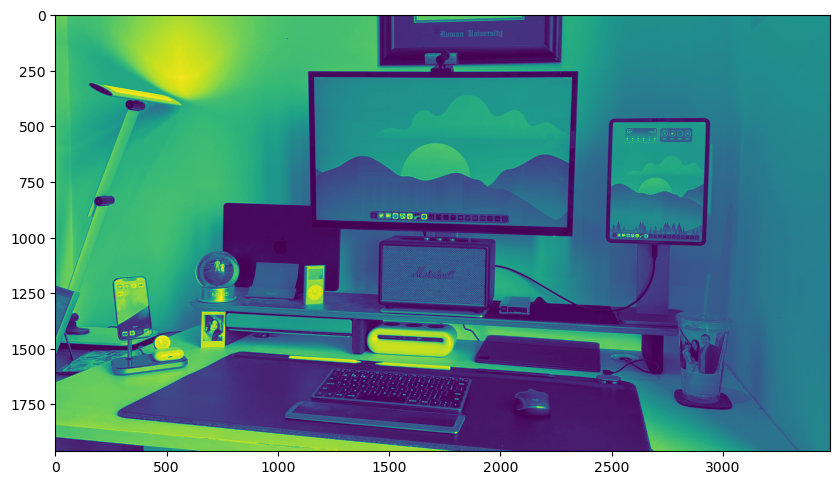

error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [49]:
plt.figure(figsize=(10,6))
plt.imshow (img)
plt.show ()

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(img, 30, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10,6))
plt.imshow (thresh)
plt.show ()

kernel_size = 5
blur_gray = cv2.GaussianBlur(thresh, (kernel_size, kernel_size), 0)

plt.figure(figsize=(10,6))
plt.imshow (blur_gray)
plt.show ()

edges = cv2.Canny(blur_gray, 10, 200)

plt.figure(figsize=(10,6))
plt.imshow (edges)
plt.show ()

gray_img_eqhist=cv2.equalizeHist(edges)
hist=cv2.calcHist(gray_img_eqhist,[0],None,[256],[0,256])

clahe=cv2.createCLAHE(clipLimit=40)
gray_img_clahe=clahe.apply(gray_img_eqhist)

th=20
max_val=255
ret ,o6=  cv2.threshold(gray_img_clahe, th, max_val,  cv2.THRESH_OTSU)


plt.figure(figsize=(10,6))
plt.imshow (o6)
plt.show ()

In [38]:
#Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(0)

# Find Canny edges 
edges = cv2.Canny(o6, 30, 200)

#Detect lines in the image
lines = lsd.detect(edges)[0] #Position 0 of the returned tuple are the detected lines

In [34]:
def dist_point_line (p, l):
    return np.linalg.norm(np.cross (l[1] - l[0], l[0] - p)) / np.linalg.norm(l[1] - l[0])

def dist_point_point (p1, p2):
    return math.dist (p1, p2)

def parallel (l1, l2):
    return abs ((l1[0][1] - l1[1][1]) / (l1[0][0] - l1[1][0]) - (l2[0][1] - l2[1][1]) / (l2[0][0] - l2[1][0]))

In [35]:
def find_4gon (prev_lines, all_lines):

    if len (prev_lines) == 4:
        i = prev_lines[0]
        last_line = prev_lines[-1]
        if all_lines[i][0][0] == all_lines[last_line][0][0] and all_lines[i][0][1] == all_lines[last_line][0][1]\
                or all_lines[i][1][0] == all_lines[last_line][1][0] and all_lines[i][0][1] == all_lines[last_line][0][1]\
                or all_lines[i][0][0] == all_lines[last_line][0][0] and all_lines[i][1][1] == all_lines[last_line][1][1]\
                or all_lines[i][1][0] == all_lines[last_line][1][0] and all_lines[i][1][1] == all_lines[last_line][1][1]:
            return prev_lines
        else:
            return None
    i = 0
    rng = len (all_lines)
    last_line = prev_lines[-1]
    while i < rng:
        if i in prev_lines:
            i = i + 1
            continue

        if all_lines[i][0][0] == all_lines[last_line][0][0] and all_lines[i][0][1] == all_lines[last_line][0][1]\
                or all_lines[i][1][0] == all_lines[last_line][1][0] and all_lines[i][0][1] == all_lines[last_line][0][1]\
                or all_lines[i][0][0] == all_lines[last_line][0][0] and all_lines[i][1][1] == all_lines[last_line][1][1]\
                or all_lines[i][1][0] == all_lines[last_line][1][0] and all_lines[i][1][1] == all_lines[last_line][1][1]:

            ret = find_4gon (prev_lines + [i], all_lines)
            
            if ret != None:
                #ret.pop (-1)
                return ret
        i = i + 1

    return None

def compare_4gon (p1, p2):

    if len (p1) != len (p2):
        return False
    
    n = 0
    for i in p1:
        if i in p2:
            n = n + i

    if n == len (p1):
        return True
    else:
        return False

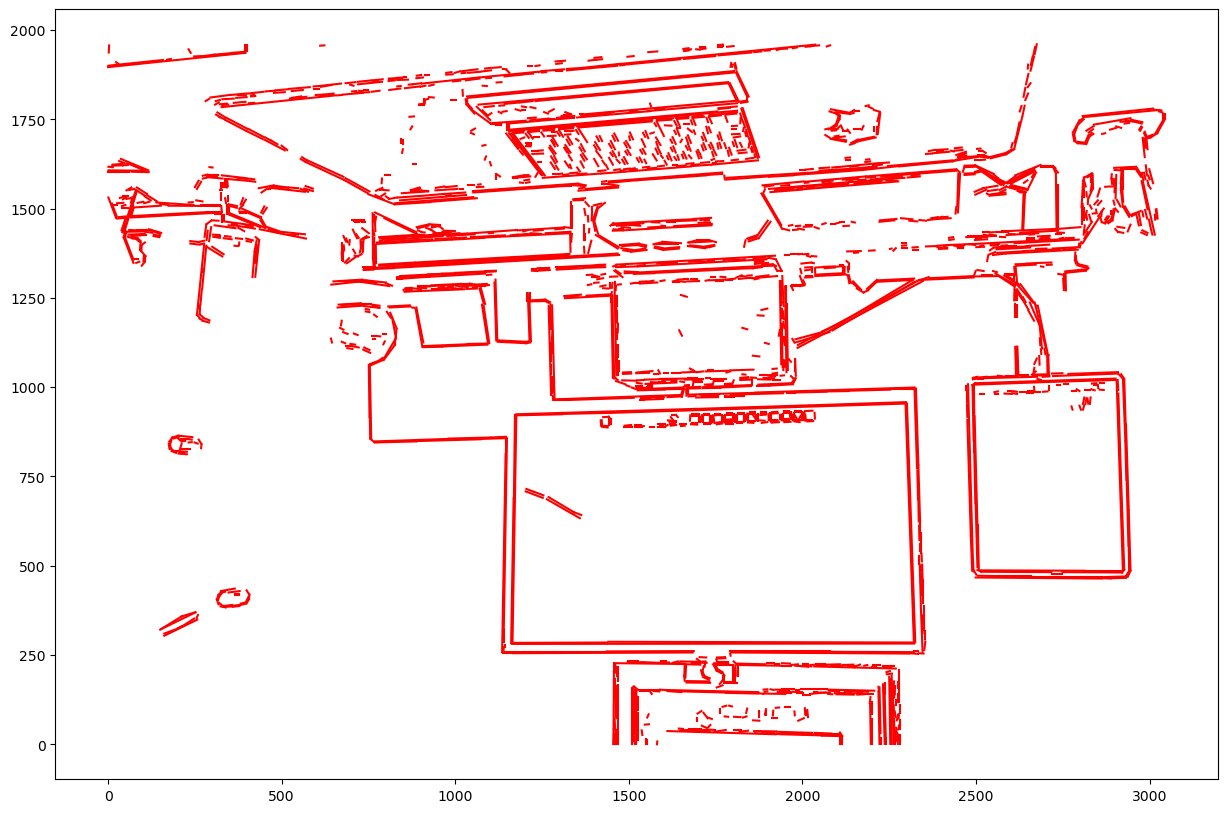

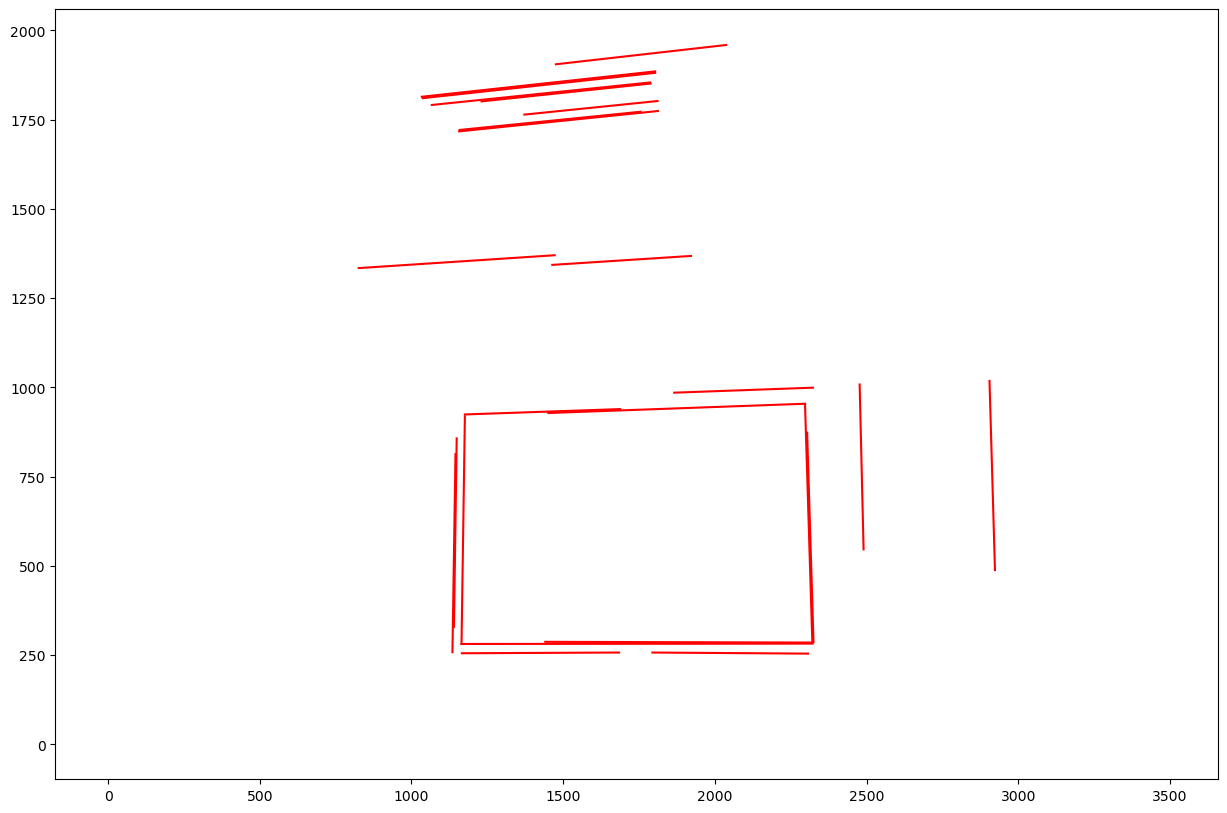

24


/tmp/ipykernel_56782/1835326210.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot ([line_i[0][0], line_i[1][0]], [line_i[0][1], line_i[1][1]], 'r-', color = 'red')
/tmp/ipykernel_56782/1835326210.py:63: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot ([line_j[0][0], line_j[1][0]], [line_j[0][1], line_j[1][1]], 'r-', color = 'blue')
/tmp/ipykernel_56782/1835326210.py:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot ([line_i[0][0], line_i[1][0]], [line_i[0][1], line_i[1][1]], 'r-', color = 'red')
/tmp/ipykernel_56782/1835326210.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string 

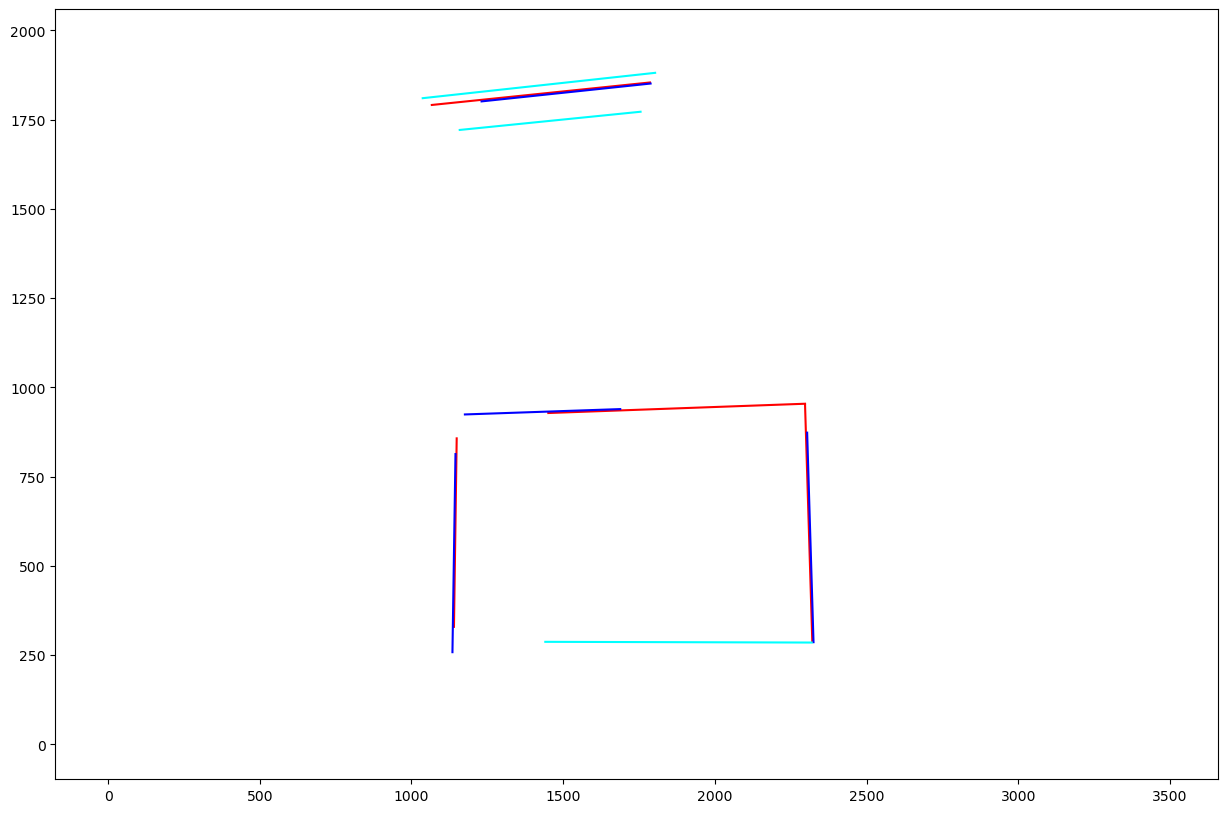

17


/tmp/ipykernel_56782/1835326210.py:100: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot ([line_j[0][0], line_j[1][0]], [line_j[0][1], line_j[1][1]], 'r-', color = 'blue')
/tmp/ipykernel_56782/1835326210.py:91: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot ([line_j[0][0], line_j[1][0]], [line_j[0][1], line_j[1][1]], 'r-', color = 'blue')


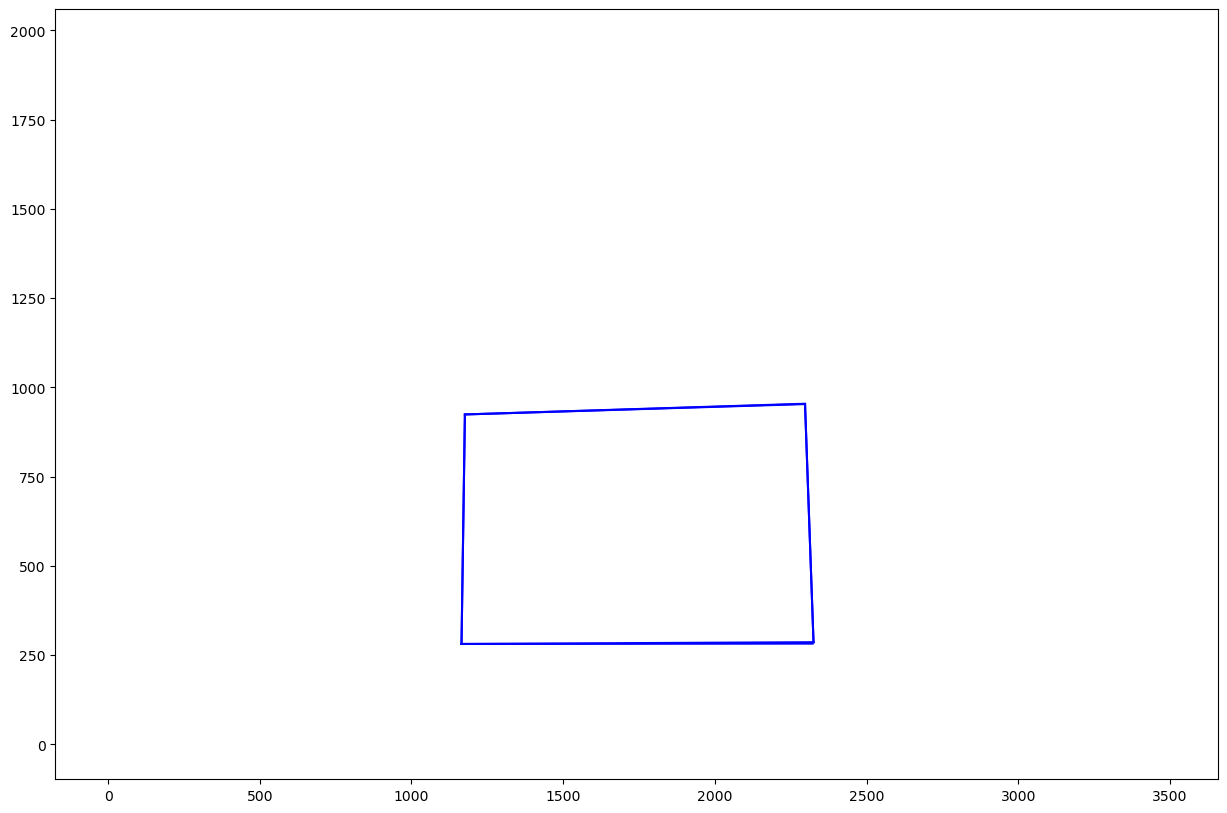

[[1, 2, 10, 9]]
[[[2325.0, 2297.0, 1176.0, 2297.0, 1176.0, 1164.0, 2325.0, 1164.0], [286.0, 953.0, 924.0, 953.0, 924.0, 281.0, 286.0, 281.0]]]


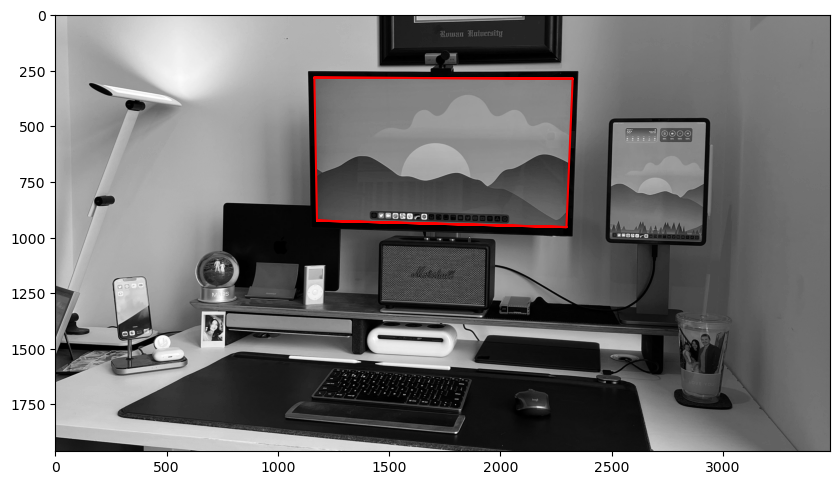

(2503, 1, 4)


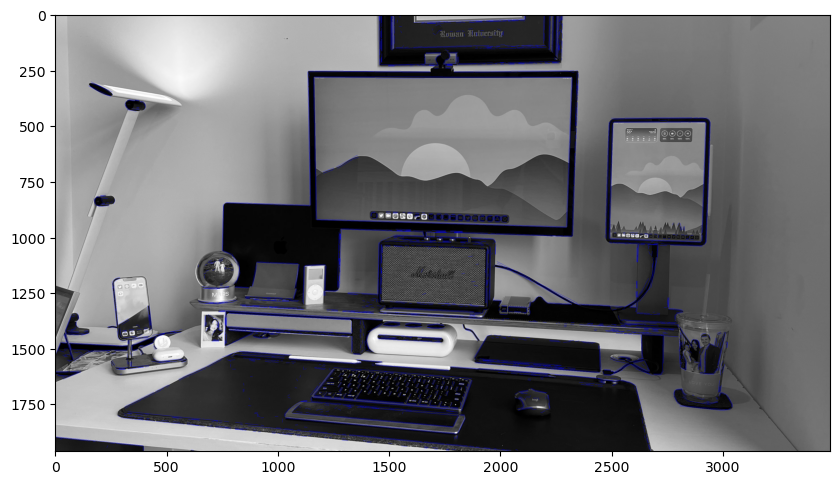

In [48]:
min_len = np.sqrt (img.shape[0]**2 + img.shape[1]**2) / 10.0


lines = np.round (lines)

plt.figure(figsize=(15,10))
for line in lines:
    plt.plot ([line[0][0], line[0][2]], [line[0][1], line[0][3]], 'r-')
plt.show ()

new_lines = []
for line in lines:
    if math.dist ([line[0][0] - line[0][2]], [line[0][1] - line[0][3]]) > min_len:
        new_lines.append ([line[0][0:2], line[0][2:4]])

plt.figure(figsize=(15,10))
plt.plot (img.shape[1], img.shape[0])
plt.plot (0, 0)
for line in new_lines:
    plt.plot ([line[0][0], line[1][0]], [line[0][1], line[1][1]], 'r-')
plt.show ()


point_point_max_dist = 10
point_line_max_dist = 10

i = 0
j = 0
rng = len (new_lines)

print (len (new_lines))

plt.figure(figsize=(15,10))
plt.plot (img.shape[1], img.shape[0])
plt.plot (0, 0)
while i < rng:
    while j < rng:
        if i != j:
            line_i = new_lines[i]
            line_j = new_lines[j]

            if dist_point_line (line_j[0], line_i) < point_line_max_dist and dist_point_line (line_j[1], line_i) < point_line_max_dist:
                if dist_point_point (line_j[0], line_i[0]) < dist_point_point (line_i[0], line_i[1]) and dist_point_point (line_j[0], line_i[1]) < dist_point_point (line_i[0], line_i[1]) and\
                        dist_point_point (line_j[1], line_i[0]) < dist_point_point (line_i[0], line_i[1]) and dist_point_point (line_j[1], line_i[1]) < dist_point_point (line_i[0], line_i[1]):
                    new_lines.pop (j)
                    rng = len (new_lines)
                    plt.plot ([line_j[0][0], line_j[1][0]], [line_j[0][1], line_j[1][1]], 'r-', color = 'cyan')
                elif dist_point_point (line_j[0], line_i[0]) < dist_point_point (line_i[0], line_i[1]) and dist_point_point (line_j[0], line_i[1]) < dist_point_point (line_i[0], line_i[1]):
                    if dist_point_point (line_j[1], line_i[0]) > dist_point_point (line_j[1], line_i[1]):
                        new_lines[i] = [line_j[1], line_i[0]]
                    else:
                        new_lines[i] = [line_j[1], line_i[1]]
                    plt.plot ([line_i[0][0], line_i[1][0]], [line_i[0][1], line_i[1][1]], 'r-', color = 'red')
                    plt.plot ([line_j[0][0], line_j[1][0]], [line_j[0][1], line_j[1][1]], 'r-', color = 'blue')
                    new_lines.pop (j)
                    rng = len (new_lines)
                elif dist_point_point (line_j[1], line_i[0]) < dist_point_point (line_i[0], line_i[1]) and dist_point_point (line_j[1], line_i[1]) < dist_point_point (line_i[0], line_i[1]):
                    if dist_point_point (line_j[0], line_i[0]) > dist_point_point (line_j[0], line_i[1]):
                        new_lines[i] = [line_j[0], line_i[0]]
                    else:
                        new_lines[i] = [line_j[0], line_i[1]]
                    plt.plot ([line_i[0][0], line_i[1][0]], [line_i[0][1], line_i[1][1]], 'r-', color = 'red')
                    plt.plot ([line_j[0][0], line_j[1][0]], [line_j[0][1], line_j[1][1]], 'r-', color = 'blue')
                    new_lines.pop (j)
                    rng = len (new_lines)
        j = j + 1
        if j > rng - 1:
            j = 0
            break
    i = i + 1
    j = 0
    if i > rng - 1:
        break
plt.show ()
print (len (new_lines))

i = 0
j = 0
rng = len (new_lines)

plt.figure(figsize=(15,10))
plt.plot (img.shape[1], img.shape[0])
plt.plot (0, 0)
while i < rng:
    while j < rng:
        if i != j:
            line_i = new_lines[i]
            line_j = new_lines[j]

            if dist_point_point (line_j[0], line_i[0]) < point_point_max_dist:
                plt.plot ([line_j[0][0], line_j[1][0]], [line_j[0][1], line_j[1][1]], 'r-', color = 'blue')
                new_lines[j][0] = new_lines[i][0]
            if dist_point_point (line_j[1], line_i[0]) < point_point_max_dist:
                plt.plot ([line_j[0][0], line_j[1][0]], [line_j[0][1], line_j[1][1]], 'r-', color = 'blue')
                new_lines[j][1] = new_lines[i][0]
            if dist_point_point (line_j[0], line_i[1]) < point_point_max_dist:
                plt.plot ([line_j[0][0], line_j[1][0]], [line_j[0][1], line_j[1][1]], 'r-', color = 'blue')
                new_lines[j][0] = new_lines[i][1]
            if dist_point_point (line_j[1], line_i[1]) < point_point_max_dist:
                plt.plot ([line_j[0][0], line_j[1][0]], [line_j[0][1], line_j[1][1]], 'r-', color = 'blue')
                new_lines[j][1] = new_lines[i][1]

        j = j + 1
        if j > rng - 1:
            j = 0
            break
    i = i + 1
    j = 0
    if i > rng - 1:
        break
plt.show ()


polygons = []
for i in range (len (new_lines)):
    ret = find_4gon ([i], new_lines)
    if ret != None:
        in_polygons = False
        for j in polygons:
            if set (j) == set (ret):
                in_polygons = True
                break

        if in_polygons == False:
            polygons.append (ret)
        

print (polygons)

new_polygons = []
for i in polygons:
    x = []
    y = []
    for j in i:
        x.append (new_lines[j][0][0])
        x.append (new_lines[j][1][0])
        y.append (new_lines[j][0][1])
        y.append (new_lines[j][1][1])
    new_polygons.append ([x, y])
print (new_polygons)

plt.figure(figsize=(10,6))
plt.imshow (img, cmap = 'gray')
for i in new_polygons:
    plt.plot (i[0], i[1], color = 'red')
plt.show ()
                

#Draw detected lines in the image
drawn_img = lsd.drawSegments(img,lines)

print (lines.shape)
#print (lines)

plt.figure(figsize=(10,6))
plt.imshow (drawn_img)
plt.show ()